In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk 
import string 
import sys
import numpy as np
import linalg
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [3]:
all_data = pd.read_csv("DataReady.csv")
all_data.shape

(5195, 11)

In [4]:
all_data.sample(10)

,Link,Data,Category,CategoryIndex,Keyword,VarKeyword,TotalFreqKeyword,TotalWord,TermRatio,interval,AVGInterval
3414,http://www.hoboes.com/FireBlade/Fiction/Carrol...,alice adventure grind alice adventure grind pe...,Kids,1.0,"['animal', 'tree', 'page', 'word', 'site', 'ga...",98,184,227,0.810573,1369,7.0
824,http://www.sniff.org/sega.html,spruce sega roshambo tournament spruce roshamb...,General,-1.0,"['student', 'rule', 'john', 'detail', 'play', ...",36,67,121,0.553719,1688,25.0
2452,http://www.planetearthfdn.org/,planet earth,General,-1.0,"['planet', 'earth']",2,2,2,1.000000,589,294.0
763,http://www.merz-verlag-en.com/,spiel messe messe essen oct deutsch contact de...,General,-1.0,"['free', 'game', 'fun', 'feel', 'gallery', 'id...",48,56,108,0.518519,2046,37.0
2831,http://superyo.nuxit.net/Razmoket/index-e.html,rugrats french rugrats site english version ru...,Kids,1.0,"['animal', 'tree', 'color', 'page', 'free', 'm...",113,217,279,0.777778,1373,6.0
2854,http://www.factmonster.com/encyclopedia/people...,magritte ren factmonster toggle navigation sea...,Kids,1.0,"['food', 'learn', 'parent', 'science', 'kid', ...",161,231,301,0.767442,1804,8.0
1717,http://www.rulesonline.com/,robert rule order online parliamentary procedu...,General,-1.0,"['page', 'learn', 'site', 'book', 'publish', '...",128,239,334,0.715569,1370,6.0
3691,http://www.ernestina.org/,schooner ernestina morrissey search learn erne...,Kids,1.0,"['sheet', 'free', 'action', 'word', 'draw', 'l...",414,1248,1974,0.632219,1098,1.0
3718,http://www.squirrel-rehab.org/puzzle/index.html,daily jigsaw puzzle free jigsaw puzzle game ag...,Kids,1.0,"['tree', 'color', 'page', 'free', 'music', 'am...",250,589,752,0.783245,1220,2.0
4195,http://contemporarydanceacademy.com/,contemporary dance academy fort collins colora...,Kids,1.0,"['learn', 'magic', 'kid', 'teacher', 'producti...",116,266,359,0.740947,1369,5.0


In [5]:
all_data.isnull().sum()

Link                 0
Data                 0
Category             0
CategoryIndex        0
Keyword              0
VarKeyword           0
TotalFreqKeyword     0
TotalWord            0
TermRatio            0
interval             0
AVGInterval         48
dtype: int64

In [6]:
clean_data = all_data
clean_data["AVGInterval"] = clean_data['AVGInterval'].replace(np.nan, 0)
clean_data.isnull().sum()

Link                0
Data                0
Category            0
CategoryIndex       0
Keyword             0
VarKeyword          0
TotalFreqKeyword    0
TotalWord           0
TermRatio           0
interval            0
AVGInterval         0
dtype: int64

In [7]:
clean_data.head(5)

,Link,Data,Category,CategoryIndex,Keyword,VarKeyword,TotalFreqKeyword,TotalWord,TermRatio,interval,AVGInterval
0,http://benjah.free.fr/,benjah free rvb notv contrat creative common,General,-1.0,"['free', 'creative', 'common']",3,3,7,0.428571,1598,533.0
1,http://www.paaw.com/,perform art artist worldwide perform art artis...,General,-1.0,"['site', 'production', 'web', 'project', 'read...",80,144,188,0.765957,1568,11.0
2,http://vlib.org/Humanities,humanity humanistic study virtual library huma...,General,-1.0,"['page', 'science', 'online', 'high', 'type', ...",60,145,219,0.662100,2063,14.0
3,http://www.berzowska.com/xy/index.html,computational expressionism,General,-1.0,['expressionism'],1,1,2,0.500000,0,0.0
4,http://www.chronotext.org/,chronotext org chronotext grow collection soft...,General,-1.0,"['tree', 'word', 'poem', 'music', 'site', 'gam...",256,476,677,0.703102,1608,3.0


In [8]:
clean_data['Category'].value_counts()

General    2684
Kids       2511
Name: Category, dtype: int64

In [9]:
# MEMBUAT DATA FRAME DENGAN ISI KOLOM YANG DIGUNAKAN SAJAA
x_data = clean_data[["Data", "TotalFreqKeyword", "TotalWord", "TermRatio", "AVGInterval"]]
y_data = clean_data["CategoryIndex"]
x_data.shape, y_data.shape

((5195, 5), (5195,))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=3)

print (x_train.shape , y_train.shape)
print (x_test.shape, y_test.shape)

(3636, 5) (3636,)
(1559, 5) (1559,)


In [11]:
x_train.sample(10)

,Data,TotalFreqKeyword,TotalWord,TermRatio,AVGInterval
1550,poker run america home magazine event home mag...,531,701,0.757489,2.0
2039,pulse planet sound science nature culture puls...,174,230,0.756522,10.0
3442,safer online skip content video cloud game saf...,63,85,0.741176,24.0
1413,airliner world global airline scene airliner w...,303,478,0.633891,7.0
5174,terrafly geospatial big data platform solution,5,6,0.833333,202.0
723,domino wikipedia domino wikipedia free encyclo...,1180,1589,0.742605,1.0
1273,page find,2,2,1.000000,60.0
2172,beautiful christmas wreath corner crafter wrea...,186,231,0.805195,5.0
2917,internet safety elmer safety elephant elmer ph...,138,162,0.851852,11.0
2669,cricket sport guardian skip main content guard...,458,637,0.718995,6.0


In [12]:
#LATENT SEMANTIC ANALYSIS

x_train_lsa = x_train["Data"]
y_train_lsa = y_train
x_test_lsa = x_test["Data"]
y_test_lsa = y_test

print(x_train_lsa.shape, y_train_lsa.shape)
print(x_test_lsa.shape, y_test_lsa.shape)

(3636,) (3636,)
(1559,) (1559,)


In [13]:
#vectorizer = CountVectorizer(max_df=0.9, min_df=5)
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5)
x_train_lsa_vec = vectorizer.fit_transform(x_train_lsa).todense()
x_test_lsa_vec = vectorizer.fit_transform(x_test_lsa).todense()
#X_tf = tfidf.fit_transform(x_train).todense()
#print (X_tf)

In [14]:
x_train_lsa_vec.shape, x_test_lsa_vec.shape

((3636, 16906), (1559, 10303))

In [15]:
svd = TruncatedSVD(n_components = 100)
lsa = make_pipeline(svd, Normalizer(copy=False))

x_transform_lsa_train = lsa.fit_transform(x_train_lsa_vec)
x_transform_lsa_test = lsa.fit_transform(x_test_lsa_vec)

U_matrix_train = x_transform_lsa_train / svd.singular_values_
S_matrix_train = np.diag(svd.singular_values_)
VT_matrix_train = svd.components_

U_matrix_test = x_transform_lsa_test / svd.singular_values_
S_matrix_test = np.diag(svd.singular_values_)
VT_matrix_test = svd.components_


In [16]:
print("Train Data 2: ", x_transform_lsa_train.shape, U_matrix_train.shape, S_matrix_train.shape, VT_matrix_train.shape)
print("Test Data 2: ", x_transform_lsa_test.shape, U_matrix_test.shape, S_matrix_test.shape, VT_matrix_test.shape)

Train Data 2:  (3636, 100) (3636, 100) (100, 100) (100, 10303)
Test Data 2:  (1559, 100) (1559, 100) (100, 100) (100, 10303)


In [17]:
sem_matrix_train_2 = np.dot(U_matrix_train, S_matrix_train)
sem_matrix_test_2 = np.dot(U_matrix_test, S_matrix_test)

sem_matrix_train_2.shape , sem_matrix_test_2.shape

((3636, 100), (1559, 100))

In [18]:
from sklearn import svm
svm_model_lsa_linear = svm.SVC(kernel='linear', gamma=1, probability=True)
svm_model_lsa_linear.fit(sem_matrix_train_2, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
svm_model_lsa_poly = svm.SVC(kernel='poly', gamma=1, probability=True)
svm_model_lsa_poly.fit(sem_matrix_train_2, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svm_model_lsa_rbf = svm.SVC(kernel='rbf', gamma=1, probability=True)
svm_model_lsa_rbf.fit(sem_matrix_train_2, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svm_model_lsa_sigmoid = svm.SVC(kernel='sigmoid', gamma=1, probability=True)
svm_model_lsa_sigmoid.fit(sem_matrix_train_2, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
lsa_value_linear = svm_model_lsa_linear.decision_function(sem_matrix_test_2)
lsa_value_poly = svm_model_lsa_poly.decision_function(sem_matrix_test_2)
lsa_value_rbf = svm_model_lsa_rbf.decision_function(sem_matrix_test_2)
lsa_value_sigmoid = svm_model_lsa_sigmoid.decision_function(sem_matrix_test_2)

lsa_predict_linear = svm_model_lsa_linear.predict(sem_matrix_test_2)
lsa_predict_poly = svm_model_lsa_poly.predict(sem_matrix_test_2)
lsa_predict_rbf = svm_model_lsa_rbf.predict(sem_matrix_test_2)
lsa_predict_sigmoid = svm_model_lsa_sigmoid.predict(sem_matrix_test_2)

In [37]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools

acc_lin = metrics.accuracy_score(y_test, lsa_predict_linear)
acc_pol = metrics.accuracy_score(y_test, lsa_predict_poly)
acc_rbf = metrics.accuracy_score(y_test, lsa_predict_rbf)
acc_sig = metrics.accuracy_score(y_test, lsa_predict_sigmoid)

print("=========================LINEAR KERNEL=========================")
print (classification_report(y_test, lsa_predict_linear))
print("akurasi : ", acc_lin)


print("=========================POLINOMIAL KERNEL=========================")
print (classification_report(y_test, lsa_predict_linear))
print("akurasi : ", acc_pol)

print("=========================RBF KERNEL=========================")
print (classification_report(y_test, lsa_predict_linear))
print("akurasi : ", acc_rbf)

print("=========================SIGMOID KERNEL=========================")
print (classification_report(y_test, lsa_predict_linear))
print("akurasi : ", acc_sig)

=========================LINEAR KERNEL=========================
              precision    recall  f1-score   support

        -1.0       0.59      0.55      0.57       820
         1.0       0.54      0.58      0.56       739

   micro avg       0.57      0.57      0.57      1559
   macro avg       0.57      0.57      0.57      1559
weighted avg       0.57      0.57      0.57      1559

akurasi :  0.5663887107119948
=========================POLINOMIAL KERNEL=========================
              precision    recall  f1-score   support

        -1.0       0.59      0.55      0.57       820
         1.0       0.54      0.58      0.56       739

   micro avg       0.57      0.57      0.57      1559
   macro avg       0.57      0.57      0.57      1559
weighted avg       0.57      0.57      0.57      1559

akurasi :  0.5933290570878769
=========================RBF KERNEL=========================
              precision    recall  f1-score   support

        -1.0       0.59      0.55     

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

        -1.0       0.59      0.55      0.57       820
         1.0       0.54      0.58      0.56       739

   micro avg       0.57      0.57      0.57      1559
   macro avg       0.57      0.57      0.57      1559
weighted avg       0.57      0.57      0.57      1559

Confusion matrix, without normalization
[[428 311]
 [365 455]]


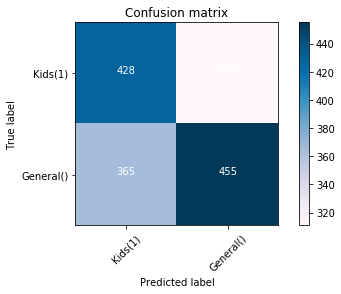

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lsa_predict_linear, labels=[1,-1])
np.set_printoptions(precision=2)

print (classification_report(y_test, lsa_predict_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Kids(1)','General()'],normalize= False,  title='Confusion matrix')

In [41]:
acc_rbf = metrics.accuracy_score(y_test, lsa_predict_rbf)
print("=========================RBF KERNEL=========================")
print (classification_report(y_test, lsa_predict_rbf))
print("akurasi : ", acc_rbf)

=========================RBF KERNEL=========================
              precision    recall  f1-score   support

        -1.0       0.60      0.59      0.60       820
         1.0       0.56      0.57      0.56       739

   micro avg       0.58      0.58      0.58      1559
   macro avg       0.58      0.58      0.58      1559
weighted avg       0.58      0.58      0.58      1559

akurasi :  0.5798588838999359


In [62]:
hitungy = y_test.to_list()
hitungy.count(1)

739